In [62]:
import matricesRalas as mr
import matplotlib.pyplot as plt
import numpy as np


In [63]:
#inicialización de matrices

#creamos la matriz de adyacencia W: si un paper j cita a un paper i, hay un 1 (j columna, i fila)
W = mr.MatrizRala(11, 11)

W[0, 2] = 1  
W[0, 3] = 1  
W[0, 4] = 1

W[1, 0] = 1  

W[4, 10] = 1

W[5, 0] = 1
W[5, 6] = 1

W[6, 0] = 1
W[6, 7] = 1
W[6, 8] = 1

W[7, 8] = 1

W[8, 5] = 1

W[9, 8] = 1


#creamos la matriz de probabilidades D
D = mr.MatrizRala(11, 11)
D[0, 0] = 1/3  
D[2, 2] = 1  
D[3, 3] = 1  
D[4, 4] = 1  
D[5, 5] = 1
D[6, 6] = 1  
D[7, 7] = 1
D[8, 8] = 1/3  
D[10, 10] = 1

#creamos la matriz identidad de las mismas dimensioens que W@D
I = mr.MatrizRala(11,11)
I[0, 0] = 1
I[1, 1] = 1
I[2, 2] = 1  
I[3, 3] = 1  
I[4, 4] = 1  
I[5, 5] = 1
I[6, 6] = 1  
I[7, 7] = 1
I[8, 8] = 1
I[9, 9] = 1
I[10, 10] = 1

#definimos los parámetros
d = 0.85
N = 11

Para encontrar $p^{*}$ podemos despejarlo de la fórmula $p^{*}=\frac{1-d}{N}+dWDp^{*}$ como sigue: <br>
$-\frac{1-d}{N}=dWDp^{*}-p^{*}$ <br>
$-\frac{1-d}{N}=(dWD-\mathbb{I})p^{*}$ <br>
Y encontramos un sistema lineal expresado en la forma matricial $b = Ax$, donde $A=dWD-\mathbb{I}$, $x=p^{*}$ y $-\frac{1-d}{N}$


In [64]:
#inicialización de A, x y b
A = (d * (W @ D)) - I
b = np.ones((N, 1)) * - ((1 - d) / N)
b_matriz_rala = mr.MatrizRala(N, 1)
for i in range(N):
    b_matriz_rala[i, 0] = b[i, 0]

#Resolver el sistema utilizando GaussJordan
p_star = mr.GaussJordan(A, b_matriz_rala)
print("Solución de p*:")
print(p_star) 

Solución de p*:
MatrizRala([ 
    [ 0.05826 ]
    [ 0.03014 ]
    [ 0.01364 ]
    [ 0.01364 ]
    [ 0.02523 ]
    [ 0.1154 ]
    [ 0.1003 ]
    [ 0.04529 ]
    [ 0.11172 ]
    [ 0.04529 ]
    [ 0.01364 ]
])


Comparamos este resultado con el obtenido a través del método iterativo $p_{t+1}=\frac{1-d}{N}+dWDp_{t}$. <br>

In [65]:
# Inicialización de variables
p_t0 = np.ones((N, 1)) * (1 / N)
a = np.ones((N, 1)) * ((1 - d) / N)  # Distribución equiprobable para la probabilidad inicial

# Crear matrices ralas
a_matriz_rala = mr.MatrizRala(N, 1)
for i in range(N):
    a_matriz_rala[i, 0] = a[i, 0]

p_t0_matriz_rala = mr.MatrizRala(N, 1)
for i in range(N):
    p_t0_matriz_rala[i, 0] = p_t0[i, 0]

diff = np.inf
iteracion = 0
diferencias = []
diferencias_pstar = []

while iteracion < 150 or diff > 1e-8:
    p_t1 = a_matriz_rala + (d * (W @ D)) @ p_t0_matriz_rala
    diff = 0  
    diff_pstar = 0
    
    # Calcular la diferencia máxima en esta iteración
    for i in range(p_t1.shape[0]):
        diff_temp = np.abs(p_t1[i, 0] - p_t0_matriz_rala[i, 0])
        diff_temp_pstar = np.abs(p_t1[i, 0] - p_star[i, 0])
        if diff_temp > diff:
            diff = diff_temp
        if diff_temp_pstar > diff_pstar:
            diff_pstar = diff_temp_pstar
    
    diferencias.append(diff)
    diferencias_pstar.append(diff_pstar)
    p_t0_matriz_rala = p_t1  
    iteracion += 1

print(p_t1)


MatrizRala([ 
    [ 0.05826 ]
    [ 0.03014 ]
    [ 0.01364 ]
    [ 0.01364 ]
    [ 0.02523 ]
    [ 0.1154 ]
    [ 0.1003 ]
    [ 0.04529 ]
    [ 0.11172 ]
    [ 0.04529 ]
    [ 0.01364 ]
])


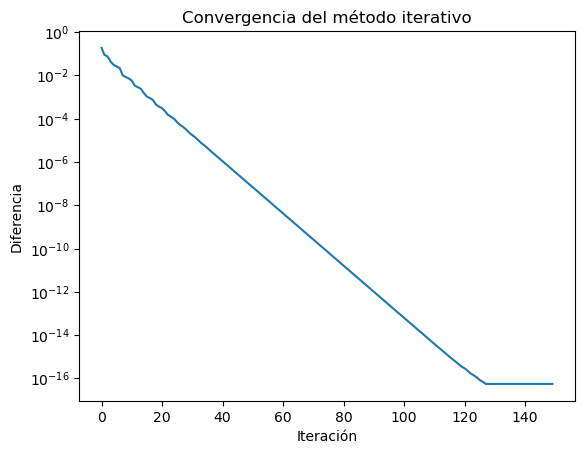

In [66]:
#graficamos la convergencia de p_t1 hacia p*
plt.plot(diferencias_pstar)
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Diferencia')
plt.title('Convergencia del método iterativo')
plt.show()